In [ ]:
import numpy as np
from matplotlib import pyplot as plt   
import matplotlib.pyplot as plt
import pandas as pd
import math
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import cv2
plt.style.use(astropy_mpl_style)
#plt.style.use("default")
#import sys
#sys.path.append('/Users/shaivi/mypy/')
import tvg
from matplotlib import pyplot, image, transforms
from scipy import ndimage
import skimage

from scipy import ndimage
import matplotlib.pyplot as plt

In [2]:
conti = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_conti_index.fits')
magincl = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magincl_index.fits')
magfield = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magfield_index.fits')
dopp = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_dopp1_index.fits')

num_scans = 59
dim = conti[1].data.shape
data_conti = np.zeros((dim[0], dim[1], num_scans))
data_magincl = np.zeros((dim[0], dim[1], num_scans))
data_Bz = np.zeros((dim[0], dim[1], num_scans))
#data_dopp = np.zeros((dim[0], dim[1], num_scans))

for i in range(num_scans):
    data_conti_temp = conti[i+1].data
    #data_conti_2=(data_conti_temp - data_conti_temp.min())*(255.0/(data_conti_temp - data_conti_temp.min()).max())
    #data_conti[:,:,i] = data_conti_2
    data_conti[:,:,i] = data_conti_temp
    np.save('/Users/shaivi/Downloads/test_conti.npy', data_conti)
   
    data_magincl_temp = magincl[i+1].data
    #data_magincl_2=(data_magincl_temp - data_magincl_temp.min())*(255.0/(data_magincl_temp - data_magincl_temp.min()).max())
    #data_magincl[:,:,i] = data_magincl_2
    data_magincl[:,:,i] = data_magincl_temp
    np.save('/Users/shaivi/Downloads/test_magincl.npy', data_magincl)

    data_magfield_temp = magfield[i+1].data
    Bz_temp =  data_magfield_temp*(np.cos(np.array(np.deg2rad(data_magincl_temp))))
    #data_Bz_2=(Bz_temp - Bz_temp.min())*(255.0/(Bz_temp - Bz_temp.min()).max())
    #data_Bz[:,:,i] = data_Bz_2
    data_Bz[:,:,i] = Bz_temp
    
    np.save('/Users/shaivi/Downloads/test_Bz.npy', data_Bz)
    
    #data_dopp_temp = dopp[i+1].data
    #data_dopp_2=(data_dopp_temp - data_dopp_temp.min())*(255.0/(data_dopp_temp - data_dopp_temp.min()).max())
    #data_dopp[:,:,i] = data_dopp_2
    #np.save('/Users/shaivi/Downloads/test_dopp1.npy', data_dopp)
    
dim = data_Bz.shape
alltogether = np.zeros((dim[0], dim[1]*3, dim[2]))
j = 0; alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_conti
j = 1 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_magincl
j = 2 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_Bz
#j = 3 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_dopp


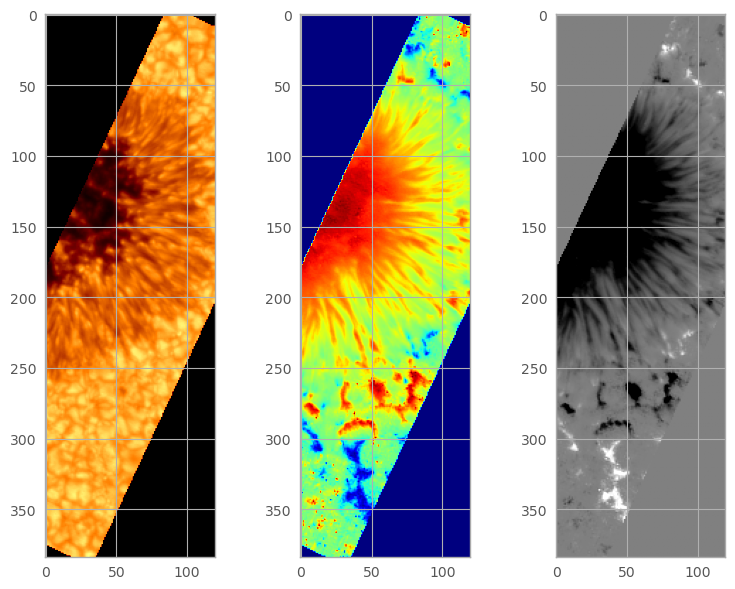

In [3]:
dc_rot = ndimage.rotate(data_conti, -25, reshape=False)
mi_rot = ndimage.rotate(data_magincl, -25, reshape=False)
bz_rot = ndimage.rotate(data_Bz, -25, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[:,:,0], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[:,:,0], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[:,:,0], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

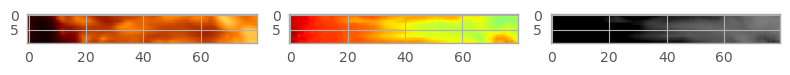

In [4]:
a = 131
b = 141
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[a:b,40:,0], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[a:b,40:,0], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[a:b,40:,0], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

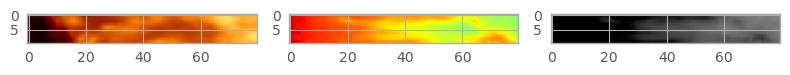

In [9]:
a = 130
b = 140
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[a:b,40:,1], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[a:b,40:,1], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[a:b,40:,1], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

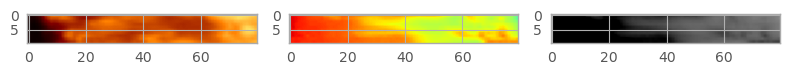

In [12]:
a = 131
b = 141
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[a:b,40:,2], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[a:b,40:,2], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[a:b,40:,2], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

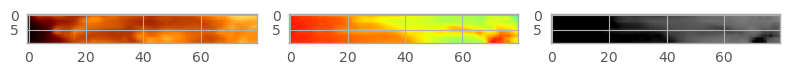

In [25]:
a = 131
b = 141
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[a:b,40:,3], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[a:b,40:,3], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[a:b,40:,3], cmap='gray', vmin=-1250, vmax=1250)
#for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

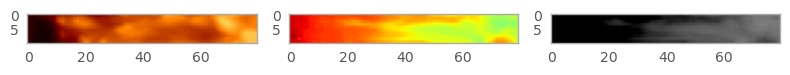

In [4]:
a = 130
b = 140
fig, ax = plt.subplots(1,3)
ax[0].imshow(dc_rot[a:b,40:,0], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(mi_rot[a:b,40:,0], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(bz_rot[a:b,40:,0], cmap='gray', vmin=-1250, vmax=1250)
for j in range(3): ax[j].grid(False)
fig.set_layout_engine('tight')
test = plt.show()

In [5]:
#continuum intensity
dc_rot[130:140,:,0][5][25:70]

array([4966.37889289, 5152.86051954, 5005.83609034, 4882.23982913,
       5067.5481671 , 5366.86181812, 5244.25184714, 4959.68678732,
       4649.08108259, 4321.64229216, 4378.05249792, 4737.83667284,
       5208.21588513, 5388.36850441, 4904.57958618, 4810.04807128,
       4406.78684182, 4135.27678216, 3934.35906027, 3733.32205746,
       3715.20609738, 3919.62833217, 3993.98405072, 4296.62278063,
       4988.95415561, 5989.33164341, 7328.51698247, 7641.72078231,
       7724.43945866, 7899.9096252 , 7919.69188001, 8255.44717883,
       8576.06233112, 8938.3686839 , 9206.91305433, 9280.41953333,
       9189.28084549, 9076.33034238, 9025.03035465, 9067.45964452,
       9005.79543345, 8978.16561646, 8951.02378123, 8987.99772474,
       9280.59742254])

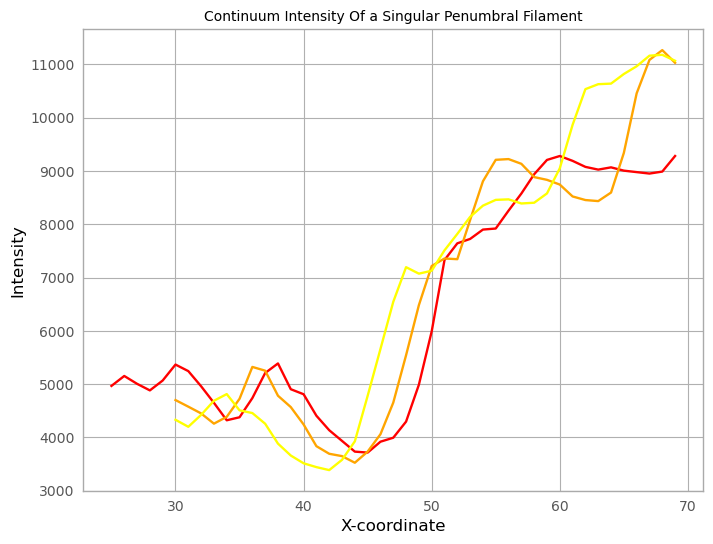

In [6]:
#vertical index [5]
dc_y0 = np.array([4966.37889289, 5152.86051954, 5005.83609034, 4882.23982913,
       5067.5481671 , 5366.86181812, 5244.25184714, 4959.68678732,
       4649.08108259, 4321.64229216, 4378.05249792, 4737.83667284,
       5208.21588513, 5388.36850441, 4904.57958618, 4810.04807128,
       4406.78684182, 4135.27678216, 3934.35906027, 3733.32205746,
       3715.20609738, 3919.62833217, 3993.98405072, 4296.62278063,
       4988.95415561, 5989.33164341, 7328.51698247, 7641.72078231,
       7724.43945866, 7899.9096252 , 7919.69188001, 8255.44717883,
       8576.06233112, 8938.3686839 , 9206.91305433, 9280.41953333,
       9189.28084549, 9076.33034238, 9025.03035465, 9067.45964452,
       9005.79543345, 8978.16561646, 8951.02378123, 8987.99772474,
       9280.59742254])
dc_x0 = range(25,70)

#vertical index [4]
dc_y1 = np.array([ 4700.81390872,  4577.0087043 ,  4450.27586468,  4258.17552551,
        4385.75173171,  4725.07120357,  5322.64608803,  5252.31756572,
        4782.11508812,  4569.32939662,  4242.74785502,  3835.62152489,
        3693.07701548,  3648.72738276,  3524.81711266,  3733.48870461,
        4059.62700843,  4652.6091113 ,  5542.53371536,  6482.27861297,
        7216.48536664,  7357.07147318,  7344.17453104,  8080.18243264,
        8806.17446515,  9209.01974568,  9222.55583494,  9133.78450091,
        8884.86186583,  8833.13731837,  8744.63536376,  8521.54257584,
        8453.94097279,  8434.37215147,  8594.52983556,  9338.58358954,
       10456.24577812, 11083.54080347, 11267.47349174, 11029.64131697])
dc_x1 = range(30,70)

#vertical index [6]
dc_y2 = np.array([ 4330.77208237,  4199.41380027,  4422.85958915,  4687.37796828,
        4813.04132361,  4507.68382431,  4457.02082463,  4256.7257817 ,
        3883.50419531,  3660.11500576,  3514.49876792,  3442.56003518,
        3386.46106773,  3579.53533205,  3926.22139528,  4779.92951057,
        5659.72020677,  6544.1212047 ,  7194.3681479 ,  7072.86643881,
        7127.71650908,  7510.35216358,  7818.57390273,  8138.43117283,
        8348.80531649,  8457.383321  ,  8466.97216908,  8389.68688038,
        8403.67874646,  8578.44349532,  9049.90896641,  9865.82868864,
       10535.21622287, 10627.95740189, 10638.86645761, 10818.9361184 ,
       10964.20325368, 11162.73726537, 11179.260713  , 11067.26713814])
dc_x2 = range(30,70)

#vertical index [5]
#mi_y3 = np.array([119.14689188, 118.29816508, 117.22296576, 116.71187611,
       #117.02160779, 116.86452767, 117.56237759, 117.39764581,
       #117.29722111, 117.83205595, 117.04586518, 116.91051429,
       #116.92873191, 118.00454868, 114.80412309, 114.58270999,
       #113.57670031, 112.66666475, 113.39828876, 112.8217511 ,
       #111.54356079, 113.23656908, 114.28132388, 115.54593513,
       #116.9943081 ])
#mi_x3 = range(45,70)

plt.title("Continuum Intensity Of a Singular Penumbral Filament")
plt.xlabel("X-coordinate")
plt.ylabel("Intensity")
plt.plot(dc_x0,dc_y0, color="red")
plt.plot(dc_x1,dc_y1, color="orange")
plt.plot(dc_x2,dc_y2, color="yellow")
#plt.plot(mi_x3,mi_y3, color="pink")

plt.show()

In [19]:
##magnetic inclinaton
mi_rot[131:141,:,2][6][30:70]

array([172.40388872, 171.18575202, 170.58990934, 169.85981966,
       167.41262313, 166.07735689, 169.24922458, 168.65457473,
       160.40793068, 163.83703759, 164.27024   , 162.94465202,
       161.34265479, 158.84645972, 156.65676094, 155.29352596,
       156.39500133, 154.90461938, 153.61875849, 154.05899844,
       154.80948012, 152.19010244, 150.97729206, 149.83440721,
       147.55102048, 146.74685004, 147.8625794 , 146.85102575,
       145.43572641, 144.80648504, 142.75252168, 141.35119524,
       137.82919414, 133.9766309 , 133.41546934, 131.78118983,
       130.10891371, 128.25185244, 127.1514314 , 127.84626211])

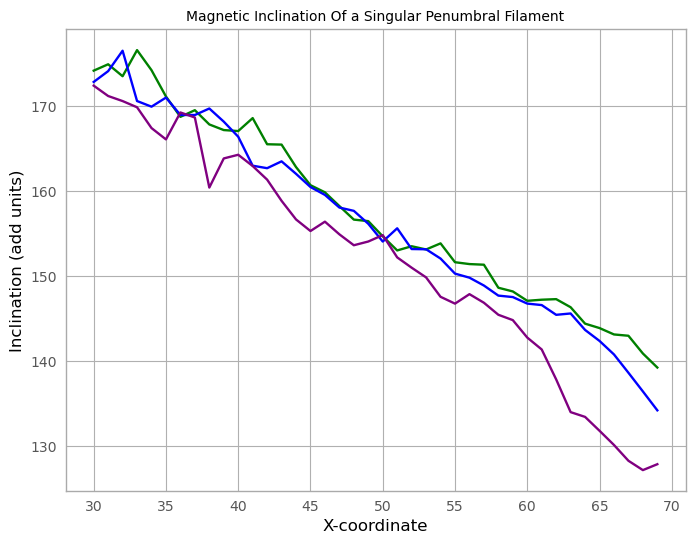

In [20]:
#vertical index [5]
mi_y0 = np.array([174.17073389, 174.92069898, 173.51285035, 176.58782235,
       174.22748132, 171.13010401, 168.7335626 , 169.51600371,
       167.83894199, 167.17691405, 167.05979986, 168.58551998,
       165.50779575, 165.46572624, 162.82225843, 160.68782105,
       159.84967204, 158.23006401, 156.63756754, 156.45810111,
       154.67262913, 153.00761675, 153.50271142, 153.12182673,
       153.84003602, 151.621385  , 151.40276712, 151.3281587 ,
       148.61802067, 148.18154305, 147.07958561, 147.20793506,
       147.27542445, 146.32340797, 144.39086537, 143.87140363,
       143.11968162, 142.96623882, 140.87725298, 139.22463724])
mi_x0 = range(30,70)

#vertical index [4]
mi_y1 = np.array([172.84192761, 174.113015  , 176.51486935, 170.59499631,
       169.93056366, 170.99936556, 168.95285883, 168.94907362,
       169.71476095, 168.16811805, 166.39302374, 162.98239254,
       162.68961863, 163.49430647, 162.02603744, 160.47284939,
       159.54369546, 158.05737786, 157.66758566, 156.14566248,
       154.05341658, 155.61526987, 153.17259373, 153.14616692,
       152.05269349, 150.2800431 , 149.80201257, 148.87821782,
       147.69083865, 147.51978597, 146.75103035, 146.57768146,
       145.42974932, 145.58868093, 143.65135721, 142.3574126 ,
       140.76490471, 138.61080793, 136.41368566, 134.18598976])
mi_x1 = range(30,70)

#vertical index [6]
mi_y2 = np.array([172.40388872, 171.18575202, 170.58990934, 169.85981966,
       167.41262313, 166.07735689, 169.24922458, 168.65457473,
       160.40793068, 163.83703759, 164.27024   , 162.94465202,
       161.34265479, 158.84645972, 156.65676094, 155.29352596,
       156.39500133, 154.90461938, 153.61875849, 154.05899844,
       154.80948012, 152.19010244, 150.97729206, 149.83440721,
       147.55102048, 146.74685004, 147.8625794 , 146.85102575,
       145.43572641, 144.80648504, 142.75252168, 141.35119524,
       137.82919414, 133.9766309 , 133.41546934, 131.78118983,
       130.10891371, 128.25185244, 127.1514314 , 127.84626211])
mi_x2 = range(30,70)

#vertical index [5]
#mi_y3 = np.array([119.14689188, 118.29816508, 117.22296576, 116.71187611,
       #117.02160779, 116.86452767, 117.56237759, 117.39764581,
       #117.29722111, 117.83205595, 117.04586518, 116.91051429,
       #116.92873191, 118.00454868, 114.80412309, 114.58270999,
       #113.57670031, 112.66666475, 113.39828876, 112.8217511 ,
       #111.54356079, 113.23656908, 114.28132388, 115.54593513,
       #116.9943081 ])
#mi_x3 = range(45,70)

plt.title("Magnetic Inclination Of a Singular Penumbral Filament")
plt.xlabel("X-coordinate")
plt.ylabel("Inclination (add units)")
plt.plot(mi_x0,mi_y0, color="green")
plt.plot(mi_x1,mi_y1, color="blue")
plt.plot(mi_x2,mi_y2, color="purple")
#plt.plot(mi_x3,mi_y3, color="pink")

plt.show()

In [23]:
#Bz plots
bz_rot[131:141,:,2][4][30:70]

array([-2335.58669852, -2355.4341264 , -2369.97106605, -2308.40065912,
       -2214.24163322, -2242.40590513, -2280.33694188, -2271.55514798,
       -2228.43311651, -2204.95716886, -2141.7637111 , -2253.67467066,
       -2148.15764913, -2062.39286214, -2037.98827043, -2010.28101435,
       -1949.92179831, -1906.51670263, -1887.52137761, -1830.14802957,
       -1782.06065291, -1677.35152661, -1686.41721931, -1625.99553995,
       -1612.31095846, -1602.35034258, -1559.70861744, -1511.08883444,
       -1515.57569518, -1490.45508444, -1466.0275739 , -1447.80584402,
       -1385.17560346, -1325.83189827, -1265.10328826, -1203.47007197,
       -1106.78756668, -1035.21838437,  -957.81051987,  -893.34057734])

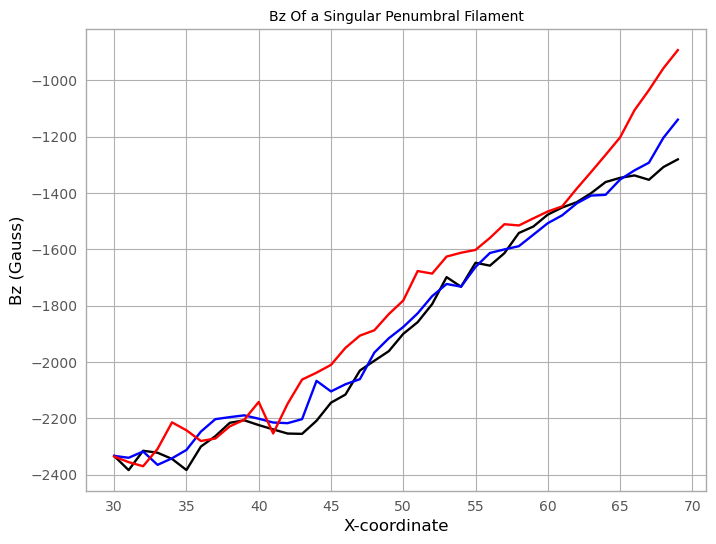

In [24]:
#vertical index [5]
bz_y0 = np.array([-2333.69643323, -2383.70486323, -2315.02524459, -2322.01175863,
       -2343.99012776, -2383.34004722, -2300.06545985, -2263.22523081,
       -2215.80060621, -2206.95419724, -2223.89883381, -2239.22944375,
       -2253.96818961, -2255.06960069, -2208.56741867, -2144.41997424,
       -2115.64754088, -2030.48966776, -1995.68237104, -1961.64334956,
       -1900.26031328, -1858.61389827, -1794.67866951, -1698.89015029,
       -1733.01960065, -1647.93632523, -1658.16858906, -1613.89170259,
       -1542.30823879, -1519.46002989, -1477.0968519 , -1451.84400696,
       -1433.08000295, -1400.99195153, -1361.54326178, -1346.63464711,
       -1338.02298057, -1353.50529586, -1308.32442552, -1280.92772593])
bz_x0 = range(30,70)

#vertical index [5]
bz_y1 = np.array([-2333.21324667, -2339.94660103, -2317.57908521, -2365.05760933,
       -2341.85937937, -2312.09953336, -2247.00572027, -2202.89029301,
       -2195.69883551, -2189.34986525, -2201.32352594, -2214.86131601,
       -2217.08236583, -2202.85555738, -2066.95130726, -2104.5108789 ,
       -2079.08521516, -2060.96909485, -1966.82309435, -1915.91386985,
       -1875.90971282, -1827.2604577 , -1766.47408933, -1723.2649598 ,
       -1732.71343351, -1662.84545014, -1613.09345354, -1600.56675676,
       -1589.08772043, -1548.45518572, -1507.5106975 , -1479.48167018,
       -1437.36512981, -1409.4744124 , -1406.86955998, -1352.74492195,
       -1320.1392199 , -1292.89593983, -1204.59885256, -1140.12757014])
bz_x1 = range(30,70)

#vertical index [4]
bz_y2 = np.array([-2335.58669852, -2355.4341264 , -2369.97106605, -2308.40065912,
       -2214.24163322, -2242.40590513, -2280.33694188, -2271.55514798,
       -2228.43311651, -2204.95716886, -2141.7637111 , -2253.67467066,
       -2148.15764913, -2062.39286214, -2037.98827043, -2010.28101435,
       -1949.92179831, -1906.51670263, -1887.52137761, -1830.14802957,
       -1782.06065291, -1677.35152661, -1686.41721931, -1625.99553995,
       -1612.31095846, -1602.35034258, -1559.70861744, -1511.08883444,
       -1515.57569518, -1490.45508444, -1466.0275739 , -1447.80584402,
       -1385.17560346, -1325.83189827, -1265.10328826, -1203.47007197,
       -1106.78756668, -1035.21838437,  -957.81051987,  -893.34057734])
bz_x2 = range(30,70)

#vertical index [5]
#mi_y3 = np.array([119.14689188, 118.29816508, 117.22296576, 116.71187611,
       #117.02160779, 116.86452767, 117.56237759, 117.39764581,
       #117.29722111, 117.83205595, 117.04586518, 116.91051429,
       #116.92873191, 118.00454868, 114.80412309, 114.58270999,
       #113.57670031, 112.66666475, 113.39828876, 112.8217511 ,
       #111.54356079, 113.23656908, 114.28132388, 115.54593513,
       #116.9943081 ])
#mi_x3 = range(45,70)

plt.title("Bz Of a Singular Penumbral Filament")
plt.xlabel("X-coordinate")
plt.ylabel("Bz (Gauss)")
plt.plot(bz_x0,bz_y0, color="black")
plt.plot(bz_x1,bz_y1, color="blue")
plt.plot(bz_x2,bz_y2, color="red")
#plt.plot(mi_x3,mi_y3, color="pink")

plt.show()

In [25]:
##expected: higher before, 